# Introduction to Image Processing in Python

This notebook follows along with [this](https://towardsdatascience.com/introduction-to-image-processing-with-python-representation-of-images-for-beginners-b95725b523ca) medium article.


## 0. Importing libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Using the scikit-image library
from skimage import img_as_uint
from skimage.io import imshow, imread
from skimage.color import rgb2gray


## 1. Representing simple arrays as images


Creating a simple 2x2 array to represent a 2x2 pixel greyscale image.


c:\Users\deshi\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


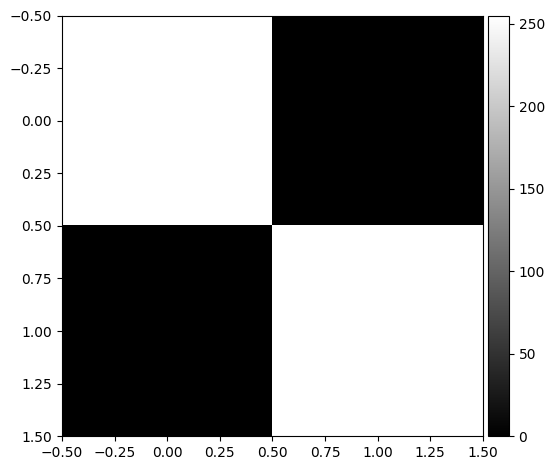

In [2]:
array = np.array([
    [255, 0],
    [0, 255]
])

# Using cmap='gray' for a greyscale image
imshow(array, cmap='gray')


Scaling that up to a 2x2x3 array to represent colour in RGB. The last dimension is used to represent the R, G and B values.


(2, 2, 3)


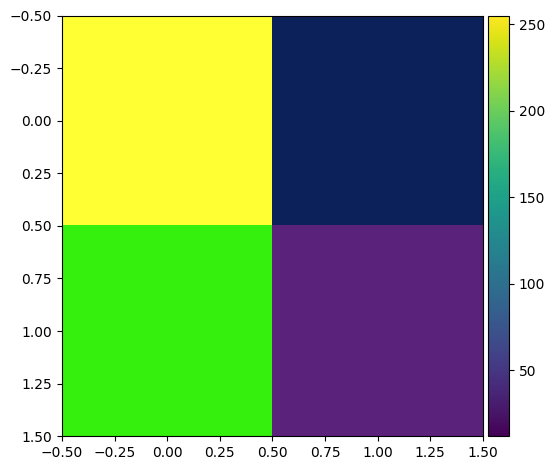

In [3]:
array = np.array([
    [
        [255, 255, 52],
        [12, 32, 90]
    ],
    [
        [52, 240, 12],
        [90, 34, 122]
    ],
])

print(array.shape)

imshow(array)


Making a 3x3 image.


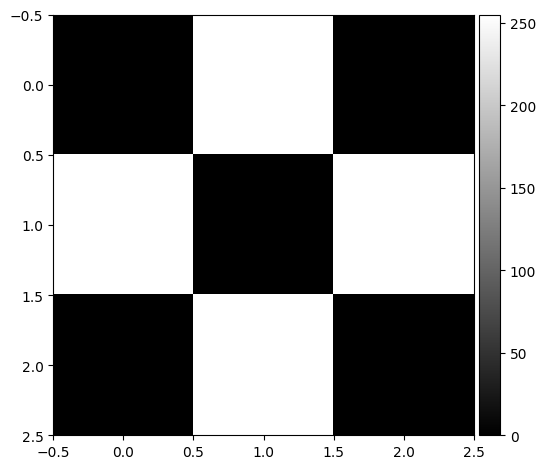

In [4]:
array = np.array([
    [0, 255, 0],
    [255, 0, 255],
    [0, 255, 0]
])

imshow(array, cmap='gray')


[This](https://numpy.org/doc/stable/reference/generated/numpy.arange.html). You know you're going to need it. Interestingly, the less the step number, the more values we get and hence the gradient is smoother.


In [5]:
step = 15

array_spectrum = np.array([
    np.arange(0, 255, step),
    np.arange(255, 0, -step),
    np.arange(0, 255, step),
    np.arange(255, 0, -step)
])

transpose_array_spectrum = array_spectrum.T


In [6]:
transpose_array_spectrum


array([[  0, 255,   0, 255],
       [ 15, 240,  15, 240],
       [ 30, 225,  30, 225],
       [ 45, 210,  45, 210],
       [ 60, 195,  60, 195],
       [ 75, 180,  75, 180],
       [ 90, 165,  90, 165],
       [105, 150, 105, 150],
       [120, 135, 120, 135],
       [135, 120, 135, 120],
       [150, 105, 150, 105],
       [165,  90, 165,  90],
       [180,  75, 180,  75],
       [195,  60, 195,  60],
       [210,  45, 210,  45],
       [225,  30, 225,  30],
       [240,  15, 240,  15]])

Text(0.5, 1.0, 'Transpose of the spectrum')

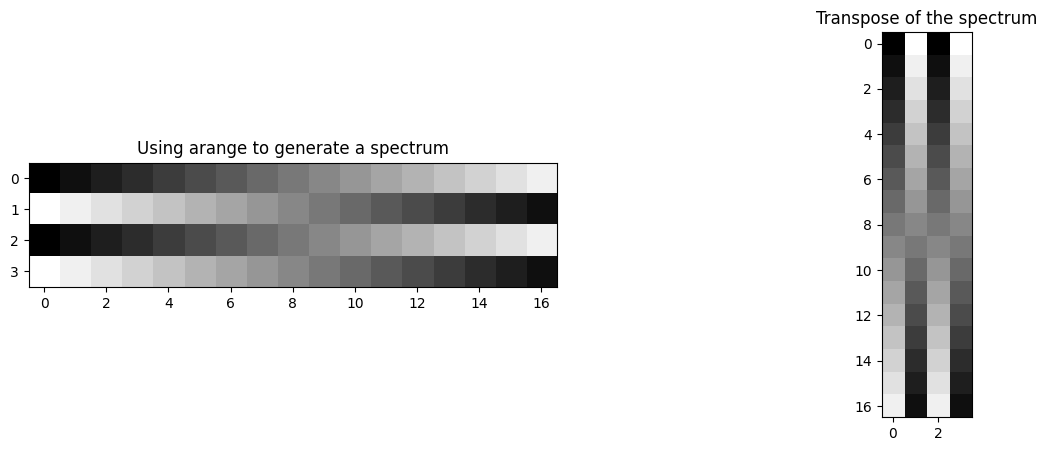

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].imshow(array_spectrum, cmap='gray')
ax[0].set_title('Using arange to generate a spectrum')

ax[1].imshow(transpose_array_spectrum, cmap='gray')
ax[1].set_title('Transpose of the spectrum')


## 2. Reading an image and manipulating it

Now, reading in an image and converting it to it's array representation of the pixel values.


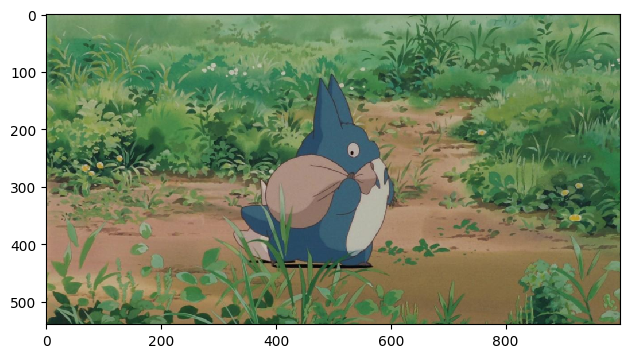

In [8]:
img = imread('../assets/image.png')
imshow(img)


The 3rd dimension refers to the pixel values. There's R, G, B and alpha. Hence, 4.


In [9]:
img.shape


(540, 1000, 4)

Here's how the image looks in array form. Pretty cryptic, isn't it?


In [10]:
img


array([[[150, 183, 140, 255],
        [149, 182, 139, 255],
        [148, 181, 138, 255],
        ...,
        [ 98, 131,  84, 255],
        [ 86, 119,  72, 255],
        [ 74, 107,  60, 255]],

       [[150, 183, 140, 255],
        [150, 183, 140, 255],
        [148, 181, 138, 255],
        ...,
        [ 98, 131,  84, 255],
        [ 84, 117,  70, 255],
        [ 71, 104,  57, 255]],

       [[150, 183, 140, 255],
        [150, 183, 140, 255],
        [147, 180, 137, 255],
        ...,
        [ 99, 132,  85, 255],
        [ 82, 115,  68, 255],
        [ 67, 100,  53, 255]],

       ...,

       [[ 59,  73,  52, 255],
        [ 58,  74,  52, 255],
        [ 55,  73,  52, 255],
        ...,
        [127, 107,  72, 255],
        [122, 102,  67, 255],
        [118,  99,  63, 255]],

       [[ 52,  71,  52, 255],
        [ 52,  72,  53, 255],
        [ 49,  72,  52, 255],
        ...,
        [127, 107,  72, 255],
        [121, 102,  67, 255],
        [117,  99,  63, 255]],

       [[ 49

Now splitting the image into 4 equal sections. The argument `sharey` to `plt.subplots()` just makes the subplots share the same _y_ axis if `True`.


Text(0.5, 1.0, 'Fourth Split')

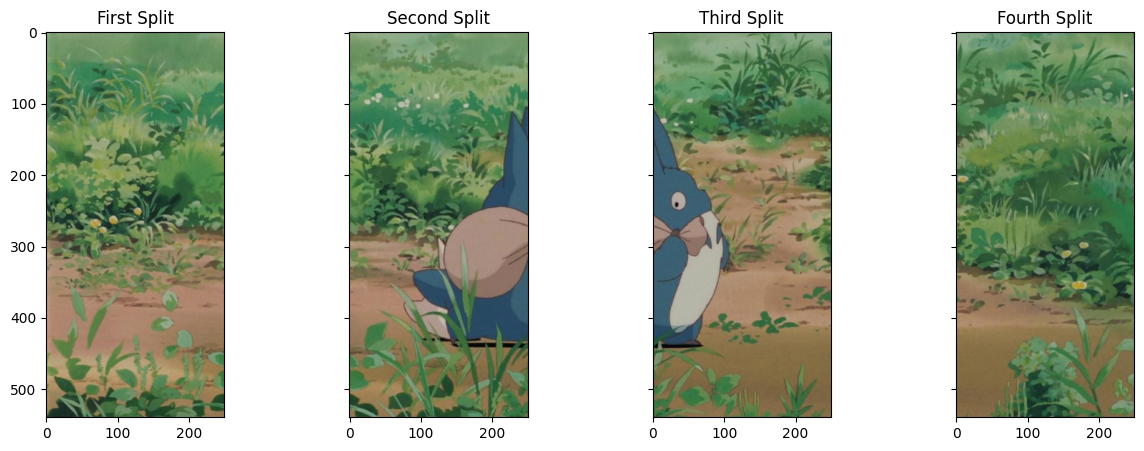

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

ax[0].imshow(img[:, 0:250])
ax[0].set_title('First Split')

ax[1].imshow(img[:, 250:500])
ax[1].set_title('Second Split')

ax[2].imshow(img[:, 500:750])
ax[2].set_title('Third Split')

ax[3].imshow(img[:, 750:1000])
ax[3].set_title('Fourth Split')


Splitting the image into it's constituent R, G and B images. We do this by splitting along the third axis.


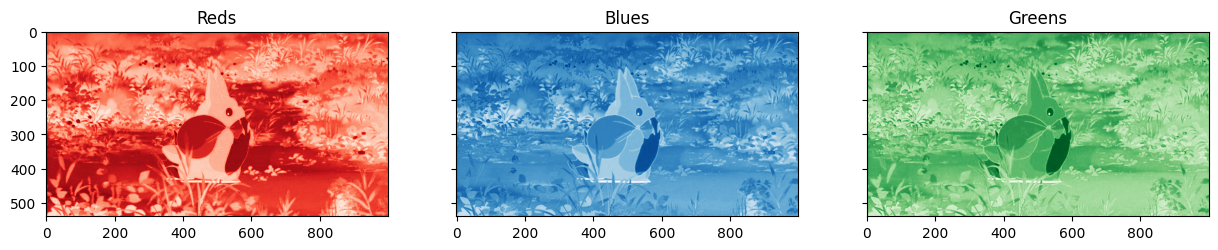

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

ax[0].set_title('Reds')
ax[0].imshow(img[:, :, 0], cmap='Reds')

ax[1].set_title('Blues')
ax[1].imshow(img[:, :, 1], cmap='Blues')

ax[2].set_title('Greens')
ax[2].imshow(img[:, :, 2], cmap='Greens')


Converting the image into a XxYx3 image to convert into a greyscale image using the `rgb2gray()` function.


In [13]:
img.shape


(540, 1000, 4)

In [14]:
img = img[:, :, :3]
img.shape


(540, 1000, 3)

Converting the image into greyscale and displaying it.


Text(0.5, 1.0, 'Greater than Mean')

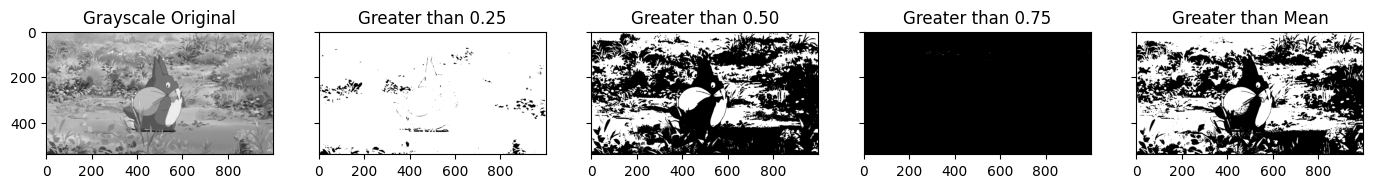

In [15]:
img_grey = rgb2gray(img)

fig, ax = plt.subplots(1, 5, figsize=(17, 6), sharey=True)

ax[0].imshow(img_grey, cmap='gray')
ax[0].set_title('Grayscale Original')

ax[1].imshow(img_as_uint(img_grey > 0.25),
             cmap='gray')
ax[1].set_title('Greater than 0.25')

ax[2].imshow(img_as_uint(img_grey > 0.50),
             cmap='gray')
ax[2].set_title('Greater than 0.50')

ax[3].imshow(img_as_uint(img_grey > 0.75),
             cmap='gray')
ax[3].set_title('Greater than 0.75')

ax[4].imshow(img_as_uint(img_grey > np.mean(img_grey)),
             cmap='gray')
ax[4].set_title('Greater than Mean')
